In [1]:
import pandas as pd

from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


### Load in Test and Validation Datasets

In [2]:
##Load in Train Set
X_train_path = "../data/preprocessed_data/training/X_train_enc.parquet"
X_train = pd.read_parquet(X_train_path)
y_train_path = "../data/preprocessed_data/training/y_train.parquet"
y_train = pd.read_parquet(y_train_path)
y_train = pd.DataFrame(y_train['label'].astype(int))

## Load in Test Set
X_test_path = "../data/preprocessed_data/test/X_test_enc.parquet"
X_test = pd.read_parquet(X_test_path)

y_test_path = "../data/preprocessed_data/test/y_test.parquet"
y_test = pd.read_parquet(y_test_path)
y_test = pd.DataFrame(y_test['label'].astype(int)) ## convert labels to int for roc auc calculation

## Load in Validation Set
X_val_path = "../data/preprocessed_data/validation/X_val_enc.parquet"
X_val = pd.read_parquet(X_val_path)

y_val_path = "../data/preprocessed_data/validation/y_val.parquet"
y_val = pd.read_parquet(y_val_path)
y_val = pd.DataFrame(y_val['label'].astype(int))

In [3]:
cols_to_drop = ['mean_-1_25', 'mean_-1_50', 'mean_-1_75', 'mean_-1_mean','mean_-1_min', 'mean_-1_max',
                'mean_0_25', 'mean_0_50', 'mean_0_75', 'mean_0_mean','mean_0_min', 'mean_0_max',
                'mean_+1_25', 'mean_+1_50', 'mean_+1_75', 'mean_+1_mean','mean_+1_min', 'mean_+1_max']

In [4]:
X_train = X_train.drop(columns = cols_to_drop, axis = 1)
X_test = X_test.drop(columns = cols_to_drop, axis = 1)
X_val = X_val.drop(columns = cols_to_drop, axis = 1)

In [5]:
## function for basic logreg
def log_reg(X_train, y_train, X_test, y_test):

    ## fit base logistic regression on training data
    logreg = LogisticRegression(random_state = 42)
    logreg.fit(X_train, y_train)

    # predicting on train and get score
    y_train_pred = logreg.predict(X_train)
    print('Model training accuracy score with Random Forest : {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))

    # predicting on test and get score
    y_test_pred = logreg.predict(X_test)
    print('Model testing accuracy score with Random Forest : {0:0.4f}'. format(accuracy_score(y_test, y_test_pred)))

    #confusion matrix plot for test
    plot_confusion_matrix(logreg, X_test, y_test) 
    plt.title('Logistic Regression Confusion Matrix')
    plt.show()
    y_test_proba = logreg.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    logreg_roc_auc = roc_auc_score(y_test, y_test_proba)

    #plot roc curve
    plt.figure()
    plt.plot(fpr, tpr, label = 'Logistic Regression Classifier (area = %0.2f)' % logreg_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc = "lower right")
    plt.show()
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
    auc_precision_recall = auc(recall, precision)

    #create pr curve   
    plt.figure()
    plt.plot(recall, precision, label = 'Logistic Regression Classifier (area = %0.2f)' % auc_precision_recall)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall')
    plt.legend(loc = "lower right")
    plt.show()

C:\Users\Zoe\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model training accuracy score with Random Forest : 0.8597
Model testing accuracy score with Random Forest : 0.9345


C:\Users\Zoe\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Zoe\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


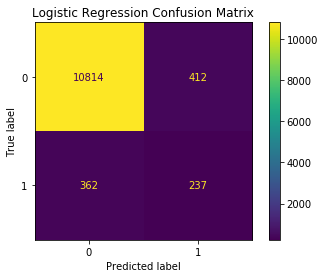

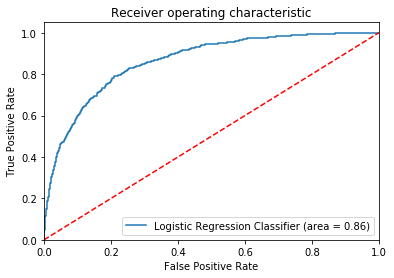

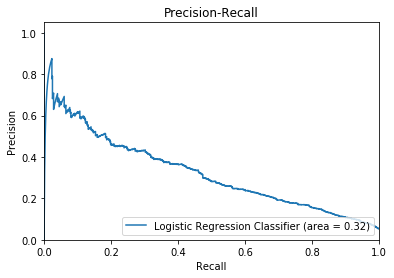

In [6]:
log_reg(X_train, y_train, X_test, y_test)

In [7]:
## function for feature selection
from sklearn.feature_selection import SelectFromModel

def var_selection(X_train, y_train):
    logreg = LogisticRegression(random_state=42)
    logreg.fit(X_train, y_train)
    sel = SelectFromModel(logreg)
    sel.fit(X_train, y_train)
    best_var = X_train.columns[(sel.get_support())]
    print(best_var)
    return best_var


## Feature Selection

In [8]:
best_var = var_selection(X_train, y_train)

C:\Users\Zoe\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoe\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Zoe\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was pa

Index(['std_-1_25', 'std_-1_75', 'std_0_25', 'std_0_50', 'std_+1_50',
       'position_0_G', 'position_1_A', 'position_1_G', 'position_1_T',
       'position_2_A', 'position_2_G', 'position_5_C', 'position_5_A',
       'position_5_T', 'position_6_T', 'position_6_A', 'position_6_G'],
      dtype='object')


C:\Users\Zoe\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Best Variables
# Index(['std_-1_25', 'std_-1_75', 'std_0_25', 'std_0_50', 'std_+1_50',
#        'position_0_G', 'position_1_A', 'position_1_G', 'position_1_T',
#        'position_2_A', 'position_2_G', 'position_5_C', 'position_5_A',
#        'position_5_T', 'position_6_T', 'position_6_A', 'position_6_G'],
#       dtype='object')

C:\Users\Zoe\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model training accuracy score with Random Forest : 0.8506
Model testing accuracy score with Random Forest : 0.9315


C:\Users\Zoe\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


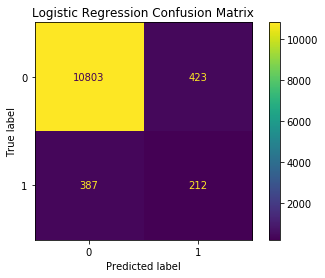

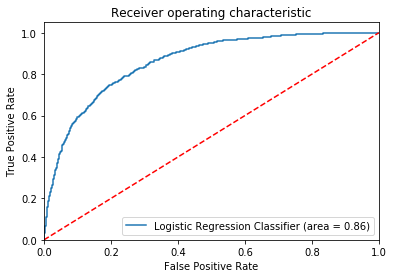

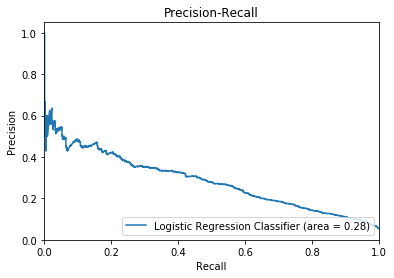

In [9]:
log_reg(X_train[best_var], y_train, X_test[best_var], y_test)